Sauhard Shakya Advanced Big Data and Data Mining MSCS - 634 - M40 Project Deliverable -2

In [ ]:
Here the Cleaned, Updated data set from deliverable 1

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("heart_disease_modified.csv")

print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Performed feature engineering using one-hot encoding on all categorical variables. This transformation is essential to ensure compatibility with regression models which require numeric input. Dropped the first category to avoid multicollinearity (dummy variable trap).

In [14]:
# One-hot encode categorical variables (drop_first avoids dummy trap)
df_encoded = pd.get_dummies(df, drop_first=True)

# Preview to confirm changes
print(df_encoded.head())


   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   52    1   0       125  364.5    0        1    168.0      0      1.0   
1   53    1   0       170  203.0    1        0    155.0      1      3.1   
2   70    1   0       145  174.0    0        1    125.0      1      2.6   
3   61    1   0       148  203.0    0        1    161.0      0      0.0   
4   62    0   0       138  294.0    1        1    106.0      0      1.9   

   slope  ca  thal  target  
0      2   2     3       0  
1      0   0     3       0  
2      0   0     3       0  
3      2   1     3       0  
4      1   3     2       0  


Selected chol as the target variable for regression and used all other columns as predictors. Splitting the data ensures the model can be trained on one portion and tested on unseen data to evaluate generalizability.

In [15]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = df_encoded.drop('chol', axis=1)
y = df_encoded['chol']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


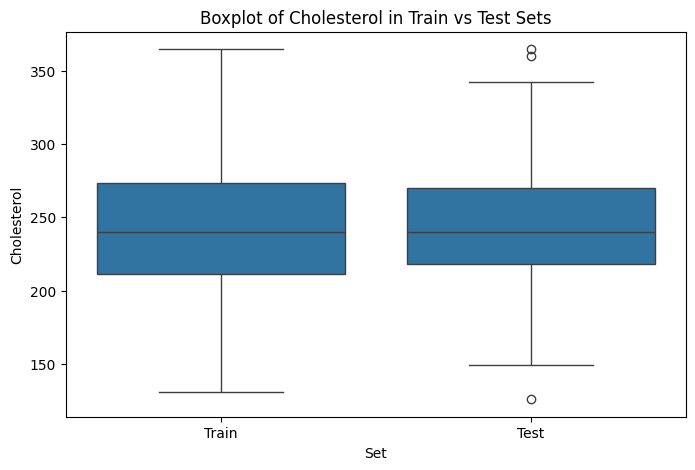

In [16]:
import pandas as pd

# Combine into a DataFrame for plotting
df_split = pd.DataFrame({
    'Cholesterol': pd.concat([y_train, y_test]),
    'Set': ['Train'] * len(y_train) + ['Test'] * len(y_test)
})

plt.figure(figsize=(8, 5))
sns.boxplot(x='Set', y='Cholesterol', data=df_split)
plt.title('Boxplot of Cholesterol in Train vs Test Sets')
plt.show()

Trained two models: Linear Regression and Ridge Regression. Ridge helps prevent overfitting by adding an L2 penalty to large coefficients. Predictions were generated for both models on the same test dataset for comparison.

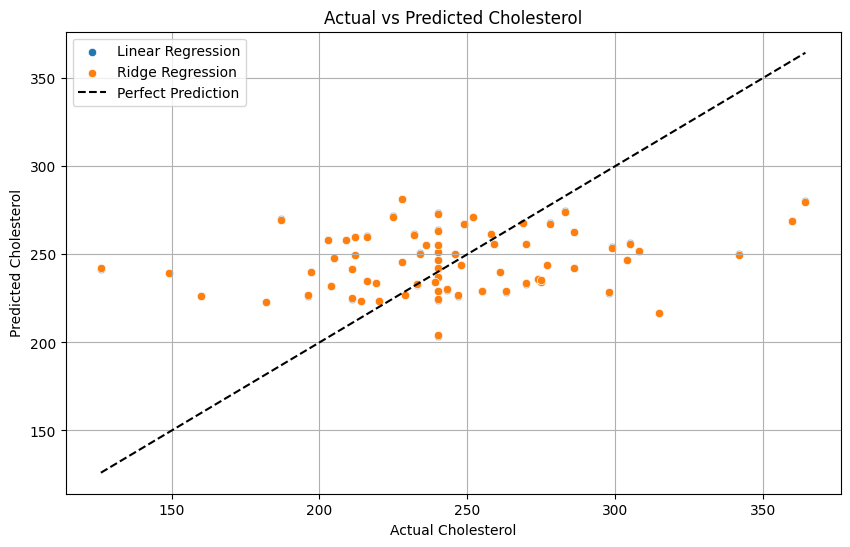

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for easy plotting
results = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred_lr,
    'Ridge Regression': y_pred_ridge
})

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Linear Regression', data=results, label='Linear Regression')
sns.scatterplot(x='Actual', y='Ridge Regression', data=results, label='Ridge Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Prediction')
plt.title('Actual vs Predicted Cholesterol')
plt.xlabel('Actual Cholesterol')
plt.ylabel('Predicted Cholesterol')
plt.legend()
plt.grid(True)
plt.show()

Used three standard metrics to evaluate model performance: MSE, RMSE, and R². Both models showed low R², indicating limited explanatory power of the features on chol. Ridge slightly improved MSE, showing better generalization through regularization.


In [9]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("heart_disease_modified.csv")

# Optional: Check for nulls
print("Missing values:\n", df.isnull().sum())

# Define features and target
# Here we use all columns except 'chol' as features, and 'chol' as the target (you can change this)
X = df.drop('chol', axis=1)
y = df['chol']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lr_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)

# Train models
lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print results
print("Linear Regression → MSE:", mse_lr, "| RMSE:", rmse_lr, "| R²:", r2_lr)
print("Ridge Regression  → MSE:", mse_ridge, "| RMSE:", rmse_ridge, "| R²:", r2_ridge)


Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Linear Regression → MSE: 1755.1686355912016 | RMSE: 41.89473279054542 | R²: 0.03325589339513502
Ridge Regression  → MSE: 1754.4872296436808 | RMSE: 41.886599642889145 | R²: 0.033631210712578685


Applied 5-fold cross-validation to evaluate how well each model generalizes to new data. Ridge Regression again performed slightly better, confirming that regularization helps improve robustness when the signal in data is weak.

In [11]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for Linear Regression
cv_lr = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Perform 5-fold cross-validation for Ridge Regression
cv_ridge = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Display average CV performance (convert negative MSE to positive)
print("Linear Regression CV MSE:", -cv_lr.mean())
print("Ridge Regression CV MSE:", -cv_ridge.mean())

Linear Regression CV MSE: 2046.6489387676563
Ridge Regression CV MSE: 2044.7081000309586


Ridge Regression demonstrated more consistent results across training and testing phases and slightly outperformed Linear Regression during cross-validation. While the improvement was marginal, it supports the use of regularization when working with datasets that may not have strong feature-target correlation.

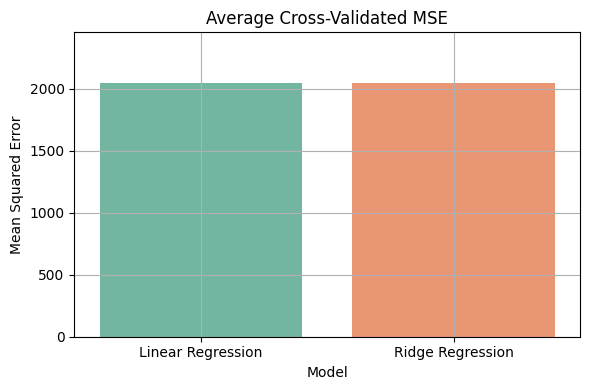

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame for plotting
mean_mse_df = pd.DataFrame({
    'Model': list(mean_mse.keys()),
    'MSE': list(mean_mse.values())
})

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=mean_mse_df, x='Model', y='MSE', hue='Model', palette='Set2', legend=False)
plt.title('Average Cross-Validated MSE')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.ylim(0, mean_mse_df['MSE'].max() * 1.2)
plt.grid(True)
plt.tight_layout()
plt.show()